In [2]:
import toolbox as tb
import tensorflow as tf

from keras.applications import EfficientNetV2L
from keras.callbacks import EarlyStopping
from keras.layers import *
from keras.metrics import *

from tensorflow.image import flip_left_right, adjust_brightness, adjust_contrast

In [3]:
INPUT_SHAPE = (224, 224, 3)
# NB_OF_LABELS = 4
DATASETS_PATH = "data/images/"
NB_OF_LABELS = len(tb.get_labels(datasets_path=DATASETS_PATH))
METRICS = ["accuracy"]
EARLY_STOP = EarlyStopping(patience=3, monitor="val_loss")

Found 3000 files belonging to 5 classes.


In [4]:
model = tb.new_model(EfficientNetV2L, include_top=False, input_shape=INPUT_SHAPE)

In [5]:
tb.freeze(model)

In [6]:
new_layers = [
    GlobalAveragePooling2D(),
    # ------------------------- #
    Dense(512, activation="relu"),
    Dropout(0.2),
    # ------------------------- #
    Dense(512, activation="relu"),
    Dropout(0.2)
]
model = tb.new_cnn(model, nb_of_labels=NB_OF_LABELS, new_layers=new_layers)

# model.summary()

In [7]:
train_dataset, validation_dataset = tb.get_datasets(folders_path="data/images")

# print(train_dataset)
# print(validation_dataset)

Found 3000 files belonging to 5 classes.
Using 2400 files for training.
Found 3000 files belonging to 5 classes.
Using 600 files for validation.


In [8]:
def augment(image, label):
    image = flip_left_right(image) # rotation
    image = adjust_brightness(image, delta=0.1) # exposition
    image = adjust_contrast(image, contrast_factor=1.75)

    return (image, label)

train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [9]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)

In [10]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

tb.compile_model(model, loss=loss_function, metrics=METRICS, learning_rate=0.001)

In [11]:
training_callbacks = [EARLY_STOP]
training = tb.train_model(
    model,
    train_data = train_dataset,
    validation_data = validation_dataset,
    nb_of_epochs = 20,
    callbacks = training_callbacks
)

Epoch 1/20
600/600 [==============================] - 697s 1s/step - loss: 0.2984 - accuracy: 0.8954 - val_loss: 0.2061 - val_accuracy: 0.9267
Epoch 2/20
600/600 [==============================] - 825s 1s/step - loss: 0.1405 - accuracy: 0.9525 - val_loss: 0.1128 - val_accuracy: 0.9600
Epoch 3/20
600/600 [==============================] - 744s 1s/step - loss: 0.1297 - accuracy: 0.9554 - val_loss: 0.0693 - val_accuracy: 0.9733
Epoch 4/20
600/600 [==============================] - 693s 1s/step - loss: 0.0799 - accuracy: 0.9754 - val_loss: 0.1329 - val_accuracy: 0.9667
Epoch 5/20
600/600 [==============================] - 684s 1s/step - loss: 0.0911 - accuracy: 0.9762 - val_loss: 0.2649 - val_accuracy: 0.9133
Epoch 6/20
600/600 [==============================] - 750s 1s/step - loss: 0.0854 - accuracy: 0.9758 - val_loss: 0.0459 - val_accuracy: 0.9783
Epoch 7/20
600/600 [==============================] - 722s 1s/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0575 - val_accuracy: 0.9833

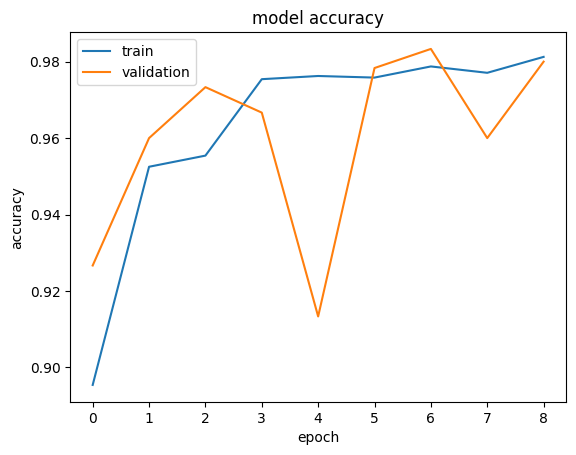

In [12]:
tb.graph("accuracy", training).show()

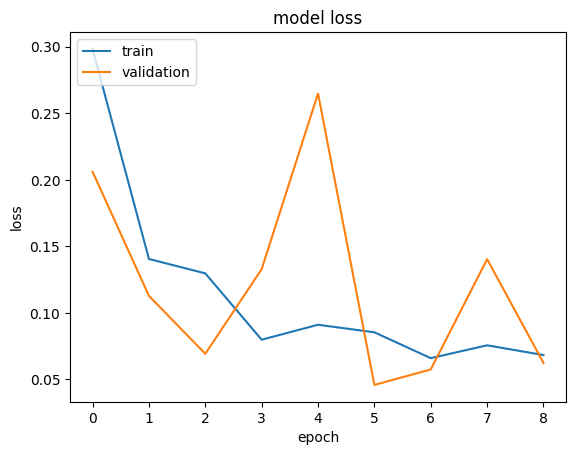

In [13]:
tb.graph("loss", training).show()

In [14]:
!mkdir -p mes_modeles
model.save(f"mes_modeles/mon_modele__{NB_OF_LABELS}_labels")

Un sous-r�pertoire ou un fichier -p existe d�j�.
Une erreur s'est produite lors du traitement de�: -p.
Un sous-r�pertoire ou un fichier mes_modeles existe d�j�.
Une erreur s'est produite lors du traitement de�: mes_modeles.


INFO:tensorflow:Assets written to: mes_modeles/mon_modele__5_labels\assets


INFO:tensorflow:Assets written to: mes_modeles/mon_modele__5_labels\assets
